**به نام خدا**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## **(1) plot data**

In [16]:
_df_accelerometer = pd.read_csv("data/Accelerometer.csv")
# _df_accelerometer

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
0,0.000000,-2.464831,6.420052,6.683414
1,0.009942,-2.493561,6.410475,6.688202
2,0.019982,-2.464831,6.410475,6.692991
3,0.029994,-2.460042,6.415264,6.702568
4,0.039929,-2.450465,6.420052,6.707356
...,...,...,...,...
3591,35.921537,-2.479196,6.372168,6.563704
3592,35.931580,-2.460042,6.367379,6.630742
3593,35.941561,-2.426523,6.396110,6.726510
3594,35.951509,-2.479196,6.381745,6.726510


In [17]:
_df_accelerometer.columns

Index(['Time (s)', 'Acceleration x (m/s^2)', 'Acceleration y (m/s^2)',
       'Acceleration z (m/s^2)'],
      dtype='object')

In [18]:
_df_accelerometer.rename(columns = {'Time (s)':'t'}, inplace = True)
_df_accelerometer.rename(columns = {'Acceleration x (m/s^2)':'x'}, inplace = True)
_df_accelerometer.rename(columns = {'Acceleration y (m/s^2)':'y'}, inplace = True)
_df_accelerometer.rename(columns = {'Acceleration z (m/s^2)':'z'}, inplace = True)


In [19]:
_df_accelerometer.columns

Index(['t', 'x', 'y', 'z'], dtype='object')

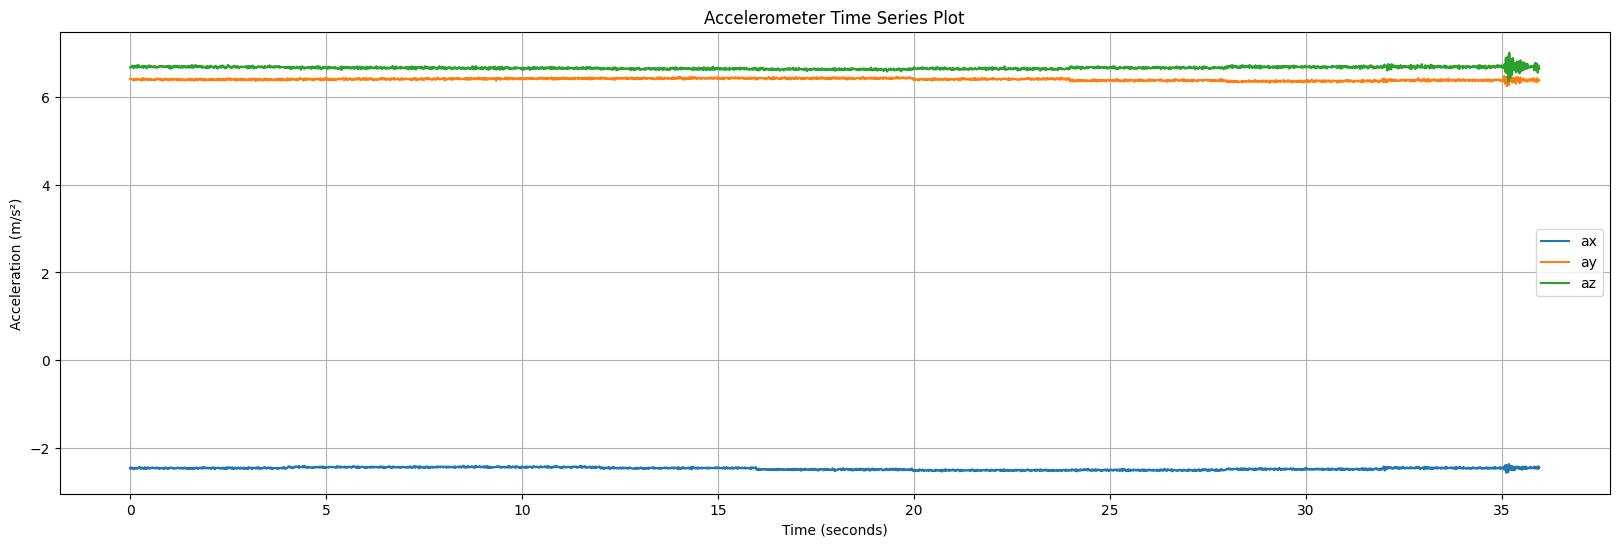

In [33]:
plt.figure(figsize=(20, 6))
plt.plot(_df_accelerometer['t'], _df_accelerometer['x'], label='ax')
plt.plot(_df_accelerometer['t'], _df_accelerometer['y'], label='ay')
plt.plot(_df_accelerometer['t'], _df_accelerometer['z'], label='az')

plt.title('Accelerometer Time Series Plot')
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (m/s²)')
plt.legend()
plt.grid(True)

In [28]:
_df_magnetometer = pd.read_csv("data/Magnetometer.csv")
_df_magnetometer.columns

Index(['Time (s)', 'Magnetic field x (µT)', 'Magnetic field y (µT)',
       'Magnetic field z (µT)'],
      dtype='object')

In [29]:
_df_magnetometer.rename(columns = {'Time (s)':'t'}, inplace = True)
_df_magnetometer.rename(columns = {'Magnetic field x (µT)':'x'}, inplace = True)
_df_magnetometer.rename(columns = {'Magnetic field y (µT)':'y'}, inplace = True)
_df_magnetometer.rename(columns = {'Magnetic field z (µT)':'z'}, inplace = True)

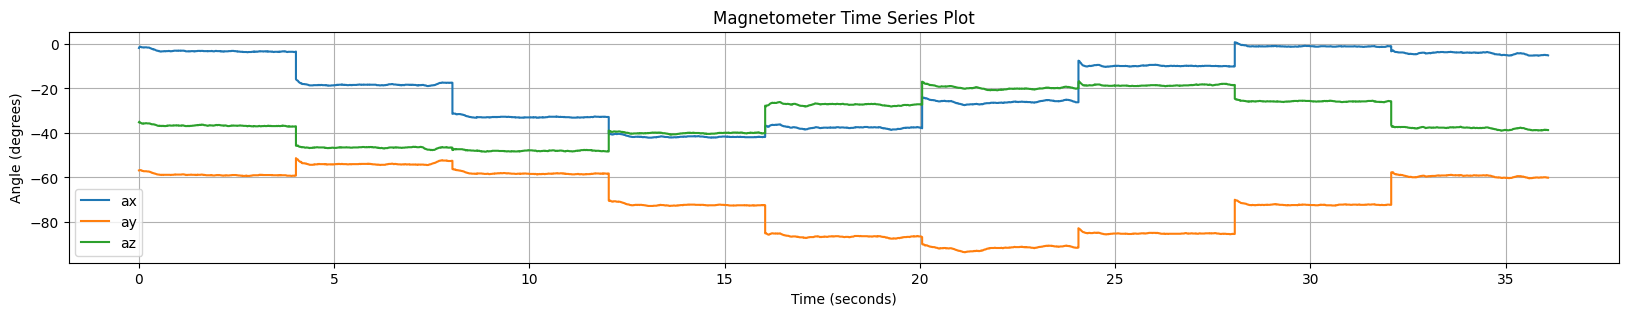

In [32]:
plt.figure(figsize=(20, 3))
plt.plot(_df_magnetometer['t'], _df_magnetometer['x'], label='ax')
plt.plot(_df_magnetometer['t'], _df_magnetometer['y'], label='ay')
plt.plot(_df_magnetometer['t'], _df_magnetometer['z'], label='az')

plt.title('Magnetometer Time Series Plot')
plt.xlabel('Time (seconds)')
plt.ylabel('Angle (degrees)')
plt.legend()
plt.grid(True)

In [38]:
m = _df_accelerometer.iloc[0]

In [40]:
m

t    0.000000
x   -2.464831
y    6.420052
z    6.683414
Name: 0, dtype: float64

In [69]:
ax, ay , az = _df_accelerometer.iloc[1]["x"],_df_accelerometer.iloc[1]["y"],_df_accelerometer.iloc[1]["z"]

In [70]:
ax, ay , az


(-2.493561029, 6.410475254, 6.688202381)

In [45]:
import numpy as np

In [71]:
np.arctan2(-ax, np.sqrt(ay**2 + az**2))

0.26292841408136547

In [48]:
np.arctan2(-ax, np.sqrt(ay**2 + az**2))

0.26292841408136547

In [49]:
np.arctan2(ay, az)


0.7641986554626778

In [52]:
# _df_accelerometer.shape
len(_df_accelerometer),len(_df_magnetometer)

(3596, 3551)

In [87]:
def calculate_euler(accello,magneto):
    ax, ay, az = accello
    mx, my, mz = magneto
    
    roll = np.arctan2(ay,az)
    pitch = np.arctan2(-ax,np.sqrt(ay**2 + az**2))

    _yaw_1 = mz * np.sin(roll) - my *np.cos(roll)
    _yaw_2 = mx * np.cos(pitch) + np.sin(pitch)*(my*np.sin(roll)+mz * np.cos(roll))

    yaw = np.arctan2(-_yaw_1,_yaw_2)

    return np.degrees(roll),np.degrees(pitch),np.degrees(yaw)
 
    # print(roll)
    # print(pitch)

    # print(ax,ay,az,mx,my,mz) 

In [88]:
pitch_list = []
roll_list = []
yaw_list = []

for i in range(len(_df_magnetometer)):
    accello = _df_accelerometer.iloc[i]
    magneto = _df_magnetometer.iloc[i]

    accello = (accello["x"],accello["z"],accello["y"])
    magneto = (magneto["x"],magneto["z"],magneto["y"])
    # calculate_euler(accello,magneto)
    roll, pitch,yaw = calculate_euler(accello,magneto)

    pitch_list.append(pitch)
    roll_list.append(roll)
    yaw_list.append(yaw)
    

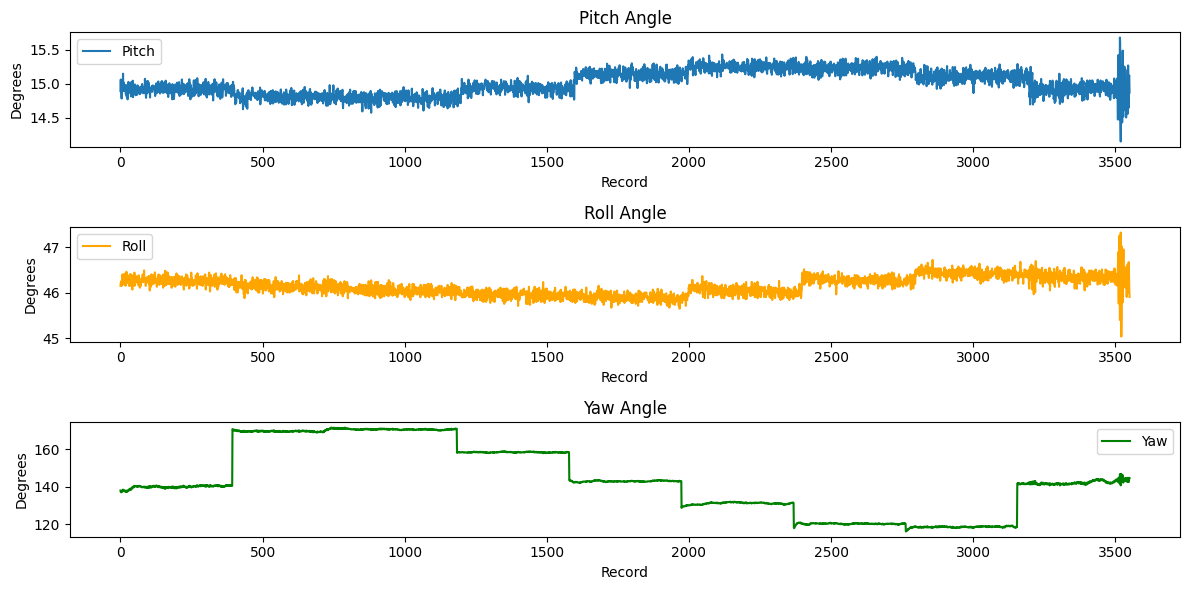

In [89]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(pitch_list, label='Pitch')
plt.xlabel('Record')
plt.ylabel('Degrees')
plt.title('Pitch Angle')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(roll_list, label='Roll', color='orange')
plt.xlabel('Record')
plt.ylabel('Degrees')
plt.title('Roll Angle')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(yaw_list, label='Yaw', color='green')
plt.xlabel('Record')
plt.ylabel('Degrees')
plt.title('Yaw Angle')
plt.legend()

plt.tight_layout()
plt.show()

## (4)

In [102]:
_df_accelerometer = pd.read_csv("data/my_Accelerometer.csv")
_df_accelerometer

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.031811,0.174078,-0.141177,9.893723,9.896262
1,0.034311,0.202792,-0.112463,9.893723,9.896441
2,0.036811,0.174078,-0.112463,9.917651,9.919816
3,0.039311,0.198006,-0.184247,9.874580,9.878284
4,0.041811,0.193220,-0.122034,9.864411,9.867058
...,...,...,...,...,...
12502,31.278846,9.951750,-0.208176,0.359522,9.960418
12503,31.281345,9.879965,-0.222533,0.349950,9.888665
12504,31.283844,9.937392,-0.208176,0.412164,9.948114
12505,31.286345,9.966106,-0.232104,0.421735,9.977726


In [105]:
_df_accelerometer.rename(columns = {'Time (s)':'t'}, inplace = True)
_df_accelerometer.rename(columns = {'Acceleration x (m/s^2)':'x'}, inplace = True)
_df_accelerometer.rename(columns = {'Acceleration y (m/s^2)':'y'}, inplace = True)
_df_accelerometer.rename(columns = {'Acceleration z (m/s^2)':'z'}, inplace = True)

In [106]:
_df_accelerometer

,t,x,y,z,Absolute acceleration (m/s^2)
0,0.031811,0.174078,-0.141177,9.893723,9.896262
1,0.034311,0.202792,-0.112463,9.893723,9.896441
2,0.036811,0.174078,-0.112463,9.917651,9.919816
3,0.039311,0.198006,-0.184247,9.874580,9.878284
4,0.041811,0.193220,-0.122034,9.864411,9.867058
...,...,...,...,...,...
12502,31.278846,9.951750,-0.208176,0.359522,9.960418
12503,31.281345,9.879965,-0.222533,0.349950,9.888665
12504,31.283844,9.937392,-0.208176,0.412164,9.948114
12505,31.286345,9.966106,-0.232104,0.421735,9.977726


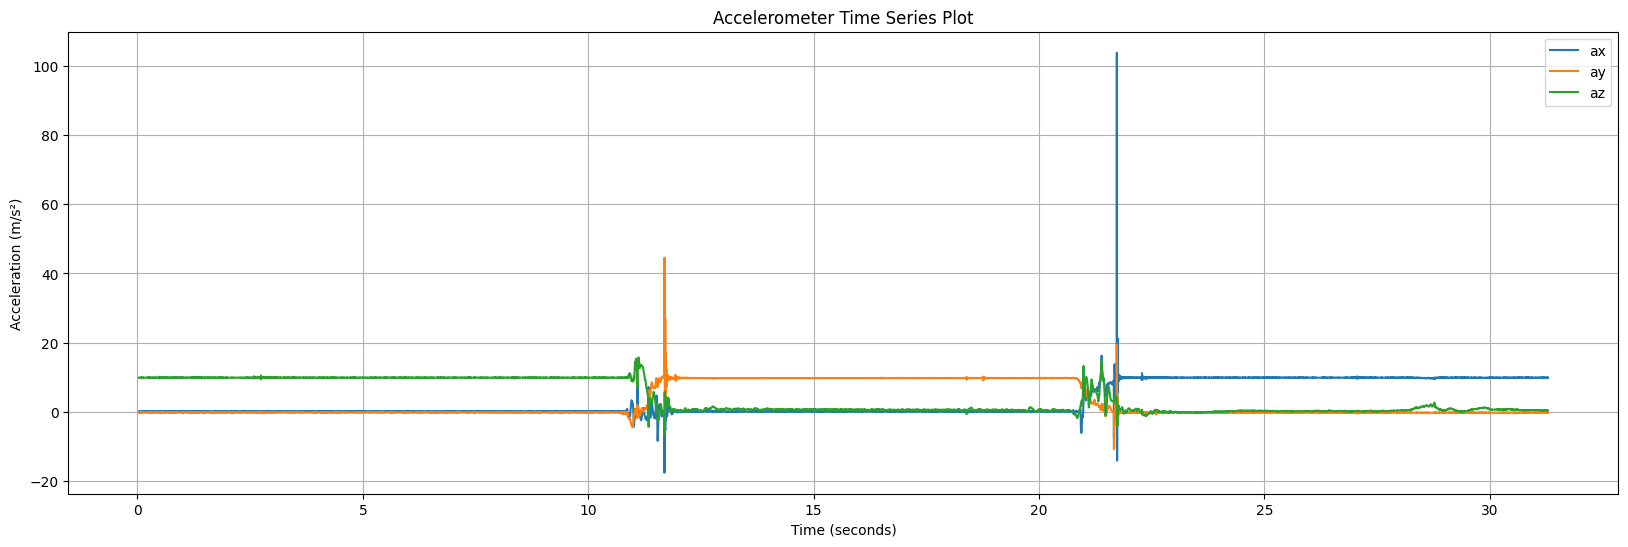

In [107]:
plt.figure(figsize=(20, 6))
plt.plot(_df_accelerometer['t'], _df_accelerometer['x'], label='ax')
plt.plot(_df_accelerometer['t'], _df_accelerometer['y'], label='ay')
plt.plot(_df_accelerometer['t'], _df_accelerometer['z'], label='az')

plt.title('Accelerometer Time Series Plot')
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (m/s²)')
plt.legend()
plt.grid(True)

## (5)

In [108]:
_df_magnetometer = pd.read_csv("data/my_Magnetometer.csv")
_df_magnetometer.columns

Index(['Time (s)', 'Magnetic Field x (µT)', 'Magnetic Field y (µT)',
       'Magnetic Field z (µT)', 'Absolute field (µT)'],
      dtype='object')

In [110]:
_df_magnetometer.rename(columns = {'Time (s)':'t'}, inplace = True)
_df_magnetometer.rename(columns = {'Magnetic Field x (µT)':'x'}, inplace = True)
_df_magnetometer.rename(columns = {'Magnetic Field y (µT)':'y'}, inplace = True)
_df_magnetometer.rename(columns = {'Magnetic Field z (µT)':'z'}, inplace = True)
_df_magnetometer

,t,x,y,z,Absolute field (µT)
0,0.048911,-2.750000,19.300001,-22.400000,29.695328
1,0.058911,-2.637500,19.437500,-22.012501,29.484284
2,0.068911,-2.562500,19.450001,-21.850000,29.364800
3,0.078911,-2.537500,19.450001,-21.825001,29.344030
4,0.088911,-2.475000,19.437500,-21.875000,29.367629
...,...,...,...,...,...
4150,41.548910,17.575001,-4.525000,-26.912500,32.459805
4151,41.558910,17.562500,-4.550000,-26.900000,32.446169
4152,41.568910,17.587500,-4.575000,-26.975000,32.525396
4153,41.578910,17.600000,-4.600000,-27.025000,32.577149


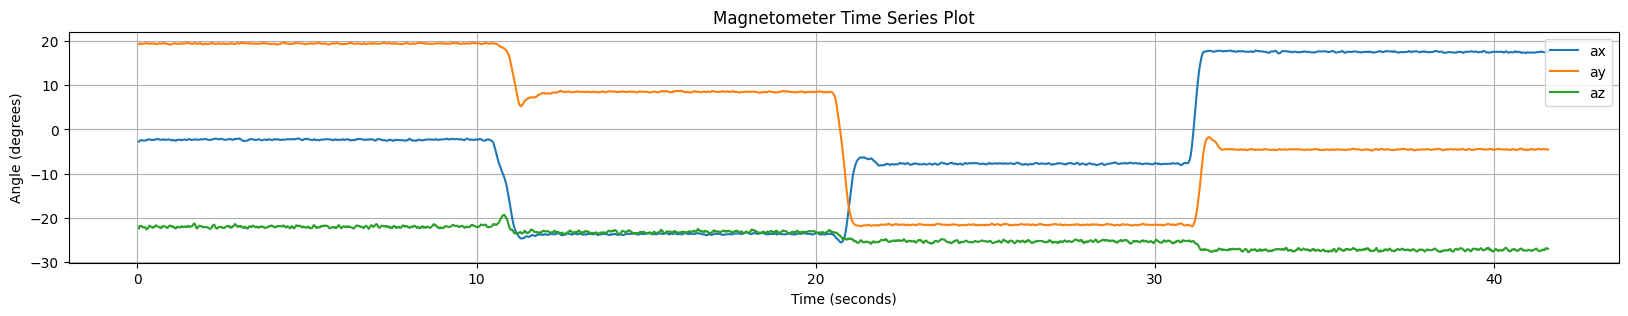

In [111]:
plt.figure(figsize=(20, 3))
plt.plot(_df_magnetometer['t'], _df_magnetometer['x'], label='ax')
plt.plot(_df_magnetometer['t'], _df_magnetometer['y'], label='ay')
plt.plot(_df_magnetometer['t'], _df_magnetometer['z'], label='az')

plt.title('Magnetometer Time Series Plot')
plt.xlabel('Time (seconds)')
plt.ylabel('Angle (degrees)')
plt.legend()
plt.grid(True)

In [112]:
pitch_list = []
roll_list = []
yaw_list = []

for i in range(len(_df_magnetometer)):
    accello = _df_accelerometer.iloc[i]
    magneto = _df_magnetometer.iloc[i]

    accello = (accello["x"],accello["z"],accello["y"])
    magneto = (magneto["x"],magneto["z"],magneto["y"])
    # calculate_euler(accello,magneto)
    roll, pitch,yaw = calculate_euler(accello,magneto)

    pitch_list.append(pitch)
    roll_list.append(roll)
    yaw_list.append(yaw)

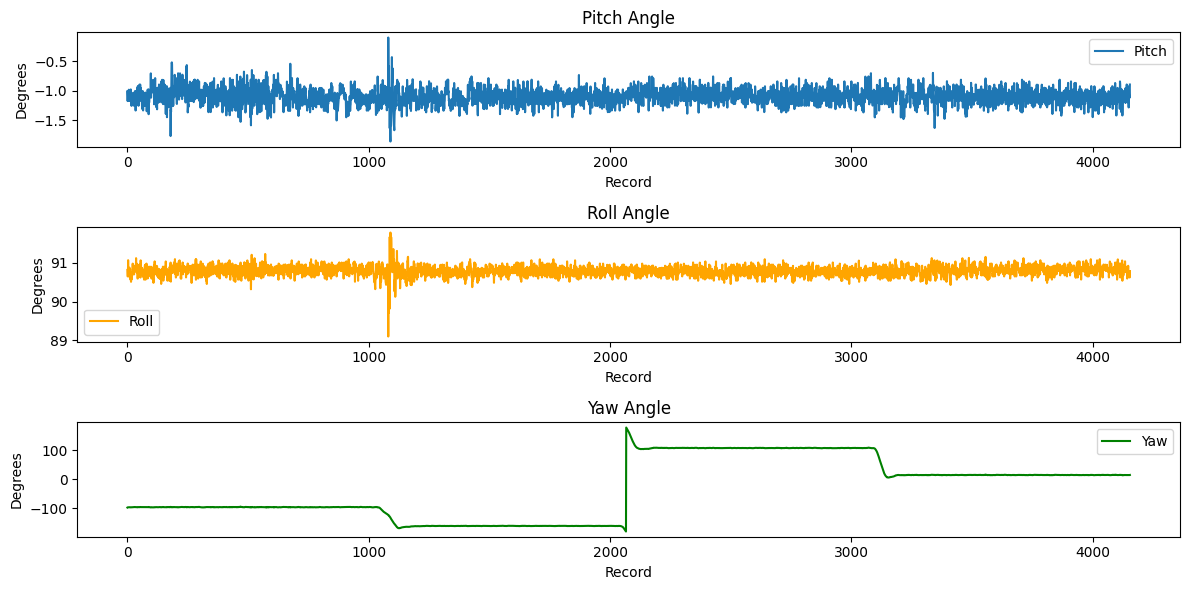

In [113]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(pitch_list, label='Pitch')
plt.xlabel('Record')
plt.ylabel('Degrees')
plt.title('Pitch Angle')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(roll_list, label='Roll', color='orange')
plt.xlabel('Record')
plt.ylabel('Degrees')
plt.title('Roll Angle')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(yaw_list, label='Yaw', color='green')
plt.xlabel('Record')
plt.ylabel('Degrees')
plt.title('Yaw Angle')
plt.legend()

plt.tight_layout()
plt.show()